<a href="https://colab.research.google.com/github/Prism194/Paper_ML/blob/main/Paper_ML2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


In previous machine learning(Paper_ML2), it was confirmed that the shape of function in the period where the urea adsorbent performed most of the adsorption was sigmoid type.  
Accordingly, it is expected that the shape of function of QNO3 adsorbent will also be a sigmoid type.  
Therefore, it is necessary to fit the sigmoid graph for the two materials at 300°C and 375°C to check whether they fit well.  
And as a result of machine learning of the QNO3 adsorbent at 375°C, it is necessary to check whether a value similar to the adsorption result of urea comes out over a long period of time.  
If similar values come out, the hypothesis that urea does not significantly affect the overall process of the adsorption reaction of carbon dioxide, but only the maximum adsorption amount and kinetics can be indirectly proved.

In [1]:
# Import required modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from scipy.optimize import curve_fit

In [2]:
# Data preparation(If you contact davidchan1@hanyang.ac.kr , I will check and give you experimental data.)
a1 = pd.read_csv()
a2 = pd.read_csv()

b1 = pd.read_csv()
b2 = pd.read_csv()

In [3]:
A1 = pd.DataFrame(a1)
A2 = pd.DataFrame(a2)

B1 = pd.DataFrame(b1)
B2 = pd.DataFrame(b2)

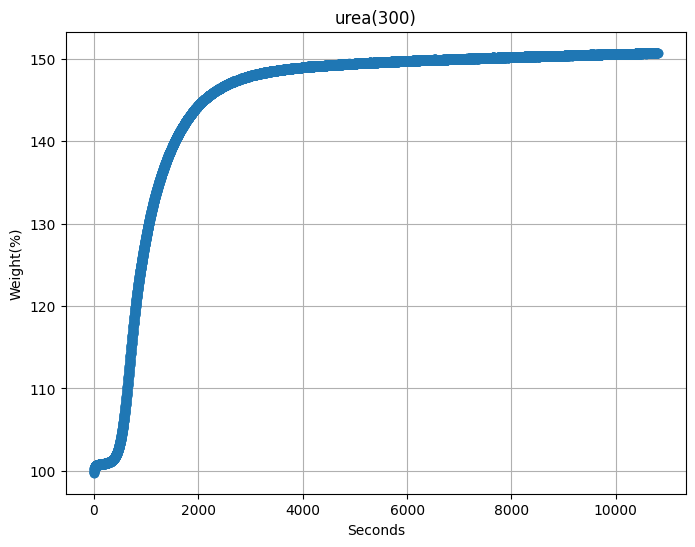

In [4]:
# Original graph
plt.figure(figsize=(8, 6))
plt.plot(A1['Seconds'], A1['Weight(%)'], marker='o')

# Graph settings
plt.xlabel('Seconds')
plt.ylabel('Weight(%)')
plt.title('urea(300)')
plt.grid(True)
plt.show()

Optimized parameters:
a (slope): 0.001582128433417074
b (center): -211.10097139973323
c (maximum value): 177.89492665435063
d (minimum value): -28.004648723170195
RMSE: 0.8246988455644223


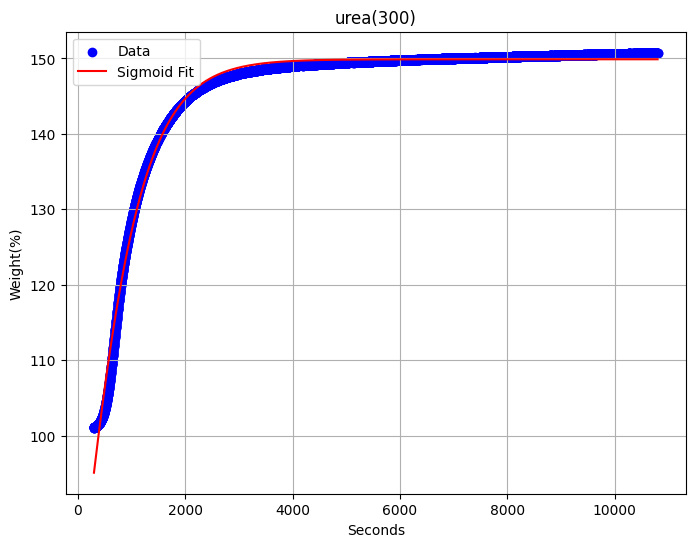

In [5]:
# Sigmoid function fitting
# Data segmentation
subset1 = A1.loc[300:]
X1 = subset1["Seconds"].values.reshape(-1, 1)
y1 = subset1["Weight(%)"].values

# Sigmoid function definition
def sigmoid(x, a, b, c, d):
    return c / (1 + np.exp(-a * (x - b))) + d

# Train, Test data split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, train_size=0.8, random_state=0)

# Optimization Fitting
popt, pcov = curve_fit(sigmoid, X1_train.flatten(), y1_train, p0=[0.1, np.mean(X1), np.max(y1), 0], maxfev = 10000) # Initial value setting

# Prediction of fitting results
y1_predict = sigmoid(X1.flatten(), *popt)

# Parameter values calculation
a, b, c, d = popt

print("Optimized parameters:")
print(f"a (slope): {a}")
print(f"b (center): {b}")
print(f"c (maximum value): {c}")
print(f"d (minimum value): {d}")

# RMSE calculation
y1_test_predict = sigmoid(X1_test.flatten(), *popt)
rmse = np.sqrt(mean_squared_error(y1_test, y1_test_predict))
print("RMSE:", rmse)

y1_predict = sigmoid(X1.flatten(), *popt)

# Visualization
plt.figure(figsize=(8, 6))
plt.scatter(X1, y1, color='blue', label='Data')  # 데이터
plt.plot(X1, y1_predict, color='red', label='Sigmoid Fit')
plt.xlabel('Seconds')
plt.ylabel('Weight(%)')
plt.title('urea(300)')
plt.grid(True)
plt.legend()
plt.show()

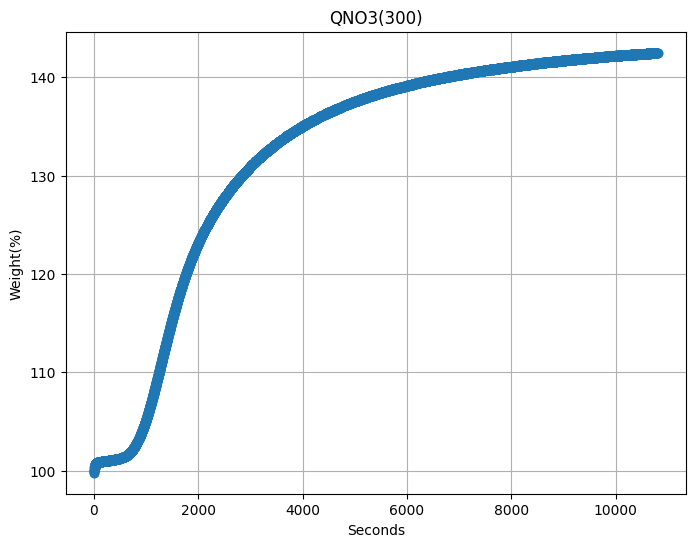

In [6]:
# Original graph
plt.figure(figsize=(8, 6))
plt.plot(B1['Seconds'], B1['Weight(%)'], marker='o')

# Graph settings
plt.xlabel('Seconds')
plt.ylabel('Weight(%)')
plt.title('QNO3(300)')
plt.grid(True)
plt.show()

Optimized parameters:
a (slope): 0.0005752803971985608
b (center): -15761.148176610335
c (maximum value): 541214.4453383067
d (minimum value): -541072.7240897027
RMSE: 0.630327846479175


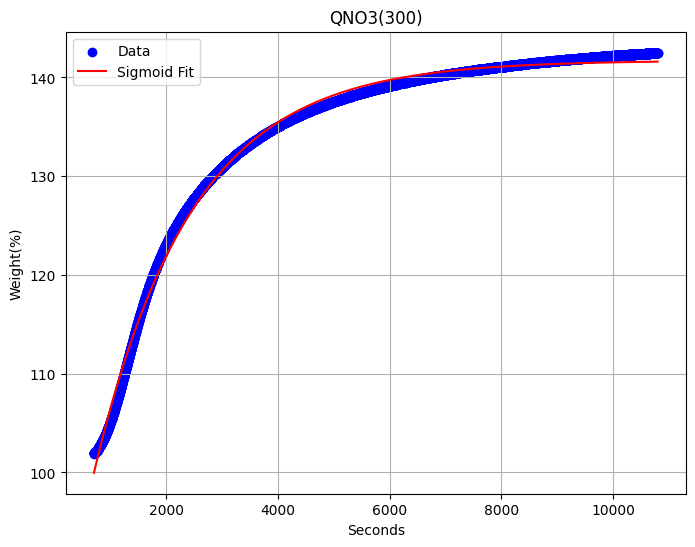

In [7]:
# Sigmoid function fitting
# Data segmentation
subset2 = B1.loc[700:]
X2 = subset2["Seconds"].values.reshape(-1, 1)
y2 = subset2["Weight(%)"].values

# Sigmoid function definition
def sigmoid(x, a, b, c, d):
    return c / (1 + np.exp(-a * (x - b))) + d

# Train, Test data split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, train_size=0.8, random_state=0)

# Optimization Fitting
popt, pcov = curve_fit(sigmoid, X2_train.flatten(), y2_train, p0=[0.1, np.mean(X2), np.max(y2), 0], maxfev = 10000) # 초기값 설정

# Prediction of fitting results
y2_predict = sigmoid(X2.flatten(), *popt)

# Parameter values calcuation
a, b, c, d = popt

print("Optimized parameters:")
print(f"a (slope): {a}")
print(f"b (center): {b}")
print(f"c (maximum value): {c}")
print(f"d (minimum value): {d}")

# RMSE calculation
y2_test_predict = sigmoid(X2_test.flatten(), *popt)
rmse = np.sqrt(mean_squared_error(y2_test, y2_test_predict))
print("RMSE:", rmse)

y2_predict = sigmoid(X2.flatten(), *popt)

# Visualization
plt.figure(figsize=(8, 6))
plt.scatter(X2, y2, color='blue', label='Data')
plt.plot(X2, y2_predict, color='red', label='Sigmoid Fit')
plt.xlabel('Seconds')
plt.ylabel('Weight(%)')
plt.title('QNO3(300)')
plt.grid(True)
plt.legend()
plt.show()

It was found that the urea and QNO3 adsorbents adsorbed most of the carbon dioxide in the form of sigmoid function at 300℃.

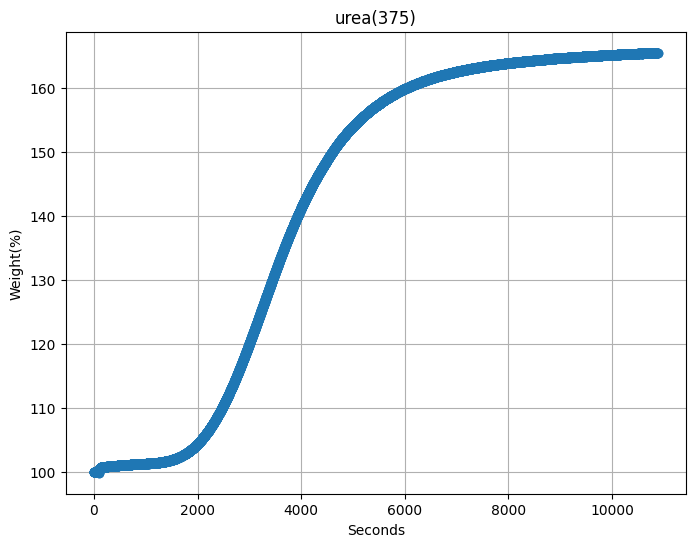

In [8]:
# Original graph
plt.figure(figsize=(8, 6))  # 그래프 크기 설정
plt.plot(A2['Seconds'], A2['Weight(%)'], marker='o')

# Graph settings
plt.xlabel('Seconds')
plt.ylabel('Weight(%)')
plt.title('urea(375)')
plt.grid(True)
plt.show()

Optimized parameters:
a (slope): 0.0010305742439965363
b (center): 3197.350686362718
c (maximum value): 79.59278235590801
d (minimum value): 85.06347096900889
RMSE: 0.5632935647293189


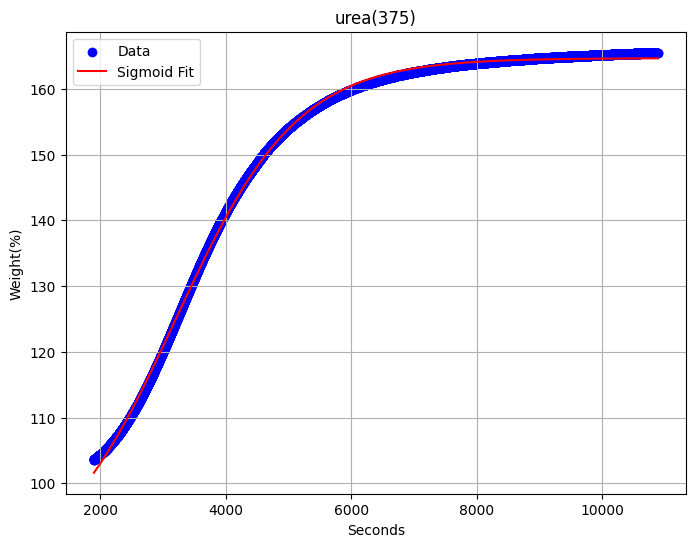

In [9]:
# Sigmoid function fitting
# Data segmentation
subset3 = A2.loc[1900:]
X3 = subset3["Seconds"].values.reshape(-1, 1)
y3 = subset3["Weight(%)"].values

# Sigmoid function definition
def sigmoid(x, a, b, c, d):
    return c / (1 + np.exp(-a * (x - b))) + d

# Train, Test data split
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, train_size=0.8, random_state=0)

# Optimization Fitting
popt, pcov = curve_fit(sigmoid, X3_train.flatten(), y3_train, p0=[0.1, np.mean(X3), np.max(y3), 0], maxfev = 10000) # 초기값 설정

# Prediction of fitting results
y3_predict = sigmoid(X3.flatten(), *popt)

# Parameter values calcuation
a, b, c, d = popt

print("Optimized parameters:")
print(f"a (slope): {a}")
print(f"b (center): {b}")
print(f"c (maximum value): {c}")
print(f"d (minimum value): {d}")

# RMSE calculation
y3_test_predict = sigmoid(X3_test.flatten(), *popt)
rmse = np.sqrt(mean_squared_error(y3_test, y3_test_predict))
print("RMSE:", rmse)

y3_predict = sigmoid(X3.flatten(), *popt)

# Visualization
plt.figure(figsize=(8, 6))
plt.scatter(X3, y3, color='blue', label='Data')
plt.plot(X3, y3_predict, color='red', label='Sigmoid Fit')
plt.xlabel('Seconds')
plt.ylabel('Weight(%)')
plt.title('urea(375)')
plt.grid(True)
plt.legend()
plt.show()

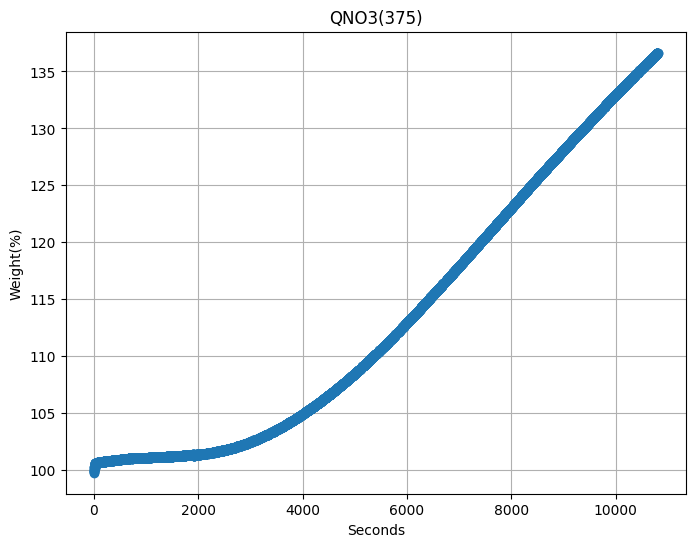

In [10]:
# Original graph
plt.figure(figsize=(8, 6))
plt.plot(B2['Seconds'], B2['Weight(%)'], marker='o')

# Graph settings
plt.xlabel('Seconds')
plt.ylabel('Weight(%)')
plt.title('QNO3(375)')
plt.grid(True)
plt.show()

Optimized parameters:
a (slope): 0.0004228814176905428
b (center): 7821.510756379448
c (maximum value): 50.67555381830929
d (minimum value): 96.76238333615063
RMSE: 0.18605935173338511


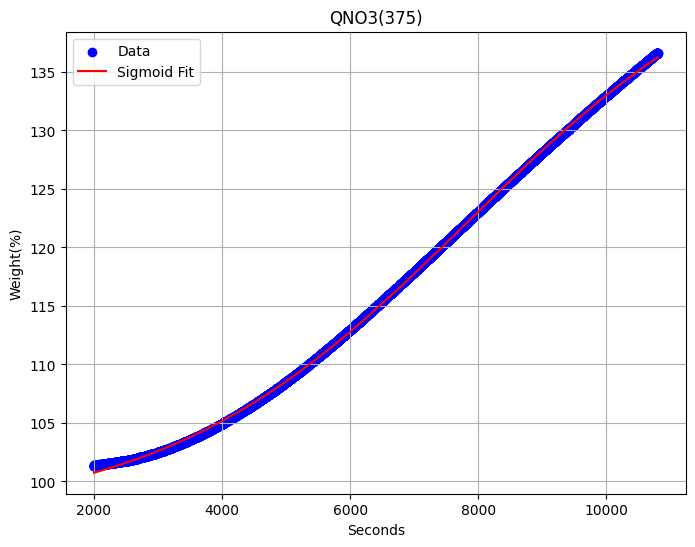

In [11]:
# Sigmoid function fitting
# Data segmentation
subset4 = B2.loc[2000:]
X4 = subset4["Seconds"].values.reshape(-1, 1)
y4 = subset4["Weight(%)"].values

# Sigmoid function definition
def sigmoid(x, a, b, c, d):
    return c / (1 + np.exp(-a * (x - b))) + d

# Train, Test data split
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, train_size=0.8, random_state=0)

# Optimization Fitting
popt, pcov = curve_fit(sigmoid, X4_train.flatten(), y4_train, p0=[0.1, np.mean(X4), np.max(y4), 0], maxfev = 10000) # 초기값 설정

# Prediction of fitting results
y4_predict = sigmoid(X4.flatten(), *popt)

# Parameter values calcuation
a, b, c, d = popt

print("Optimized parameters:")
print(f"a (slope): {a}")
print(f"b (center): {b}")
print(f"c (maximum value): {c}")
print(f"d (minimum value): {d}")

# RMSE calculation
y4_test_predict = sigmoid(X4_test.flatten(), *popt)
rmse = np.sqrt(mean_squared_error(y4_test, y4_test_predict))
print("RMSE:", rmse)

y4_predict = sigmoid(X4.flatten(), *popt)

# Visualization
plt.figure(figsize=(8, 6))
plt.scatter(X4, y4, color='blue', label='Data')
plt.plot(X4, y4_predict, color='red', label='Sigmoid Fit')
plt.xlabel('Seconds')
plt.ylabel('Weight(%)')
plt.title('QNO3(375)')
plt.grid(True)
plt.legend()
plt.show()

The formula is as follows
urea(375) : $y = \frac{79.5928}{1 + \exp\left(-0.001031 \cdot (x - 3197.3507)\right)} + 85.06347$

QNO3(375) : $y = \frac{50.6756}{1 + \exp\left(-0.0004229 \cdot (x - 7821.5108)\right)} + 96.7624$

It was confirmed that urea and QNO3 adsorbents adsorbed most of the carbon dioxide in the form of sigmoid functions even at 375℃.

Sigmoid value for Urea at x = 100000: 164.65625332491692
Sigmoid value for QNO3 at x = 100000: 147.43793715445992


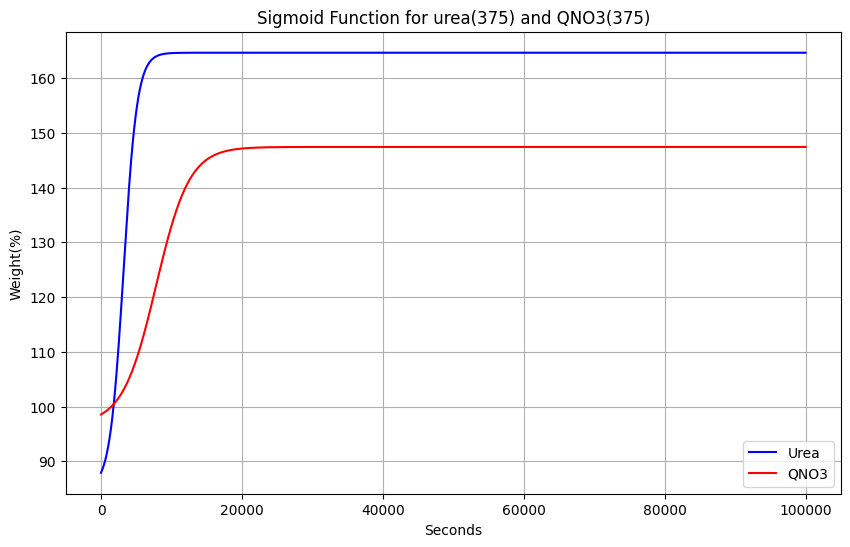

In [12]:
# Sigmoid function definition
def sigmoid(x, a, b, c, d):
    return c / (1 + np.exp(-a * (x - b))) + d

# Parameters of urea
a_urea = 0.0010305742439965363
b_urea = 3197.350686362718
c_urea = 79.59278235590801
d_urea = 85.06347096900889

# Parameters of QNO3
a_qno3 = 0.0004228814176905428
b_qno3 = 7821.510756379448
c_qno3 = 50.67555381830929
d_qno3 = 96.76238333615063

# x points generation
x = np.linspace(0, 100000, 1000)

# Sigmoid values calculation
urea_values = sigmoid(x, a_urea, b_urea, c_urea, d_urea)
qno3_values = sigmoid(x, a_qno3, b_qno3, c_qno3, d_qno3)

# Sigmoid value at 100000 second
lim_urea = sigmoid(100000, a_urea, b_urea, c_urea, d_urea)
lim_qno3 = sigmoid(100000, a_qno3, b_qno3, c_qno3, d_qno3)

# Results
print(f"Sigmoid value for Urea at x = {100000}: {lim_urea}")
print(f"Sigmoid value for QNO3 at x = {100000}: {lim_qno3}")

# Visualization
plt.figure(figsize=(10, 6))
plt.plot(x, urea_values, label="Urea", color="blue")
plt.plot(x, qno3_values, label="QNO3", color="red")
plt.xlabel("Seconds")
plt.ylabel("Weight(%)")
plt.title("Sigmoid Function for urea(375) and QNO3(375)")
plt.legend()
plt.grid()
plt.show()


According to the machine learning results for the QNO3 adsorbent at 375°C, it was confirmed that the results were not significantly different from those of the urea adsorbent, but only the kinetics and capacity were different. Therefore, this result sugests that the previously suggested hypothesis is suitable.

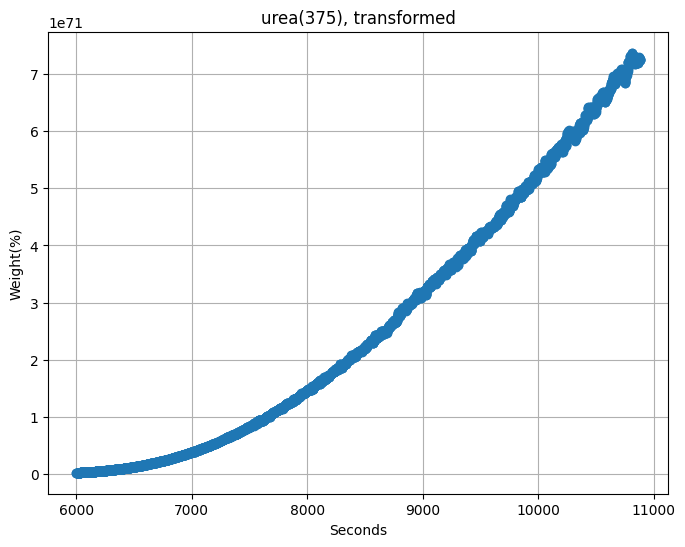

In [16]:
# Data transformation
subset5 = A2.loc[6000:]

X5 = subset5["Seconds"].values.reshape(-1, 1)
y5 = np.exp(subset5["Weight(%)"].values)

plt.figure(figsize=(8, 6))
plt.plot(X5, y5, marker='o')

plt.xlabel('Seconds')
plt.ylabel('Weight(%)')
plt.title('urea(375), transformed')
plt.grid(True)
plt.show()

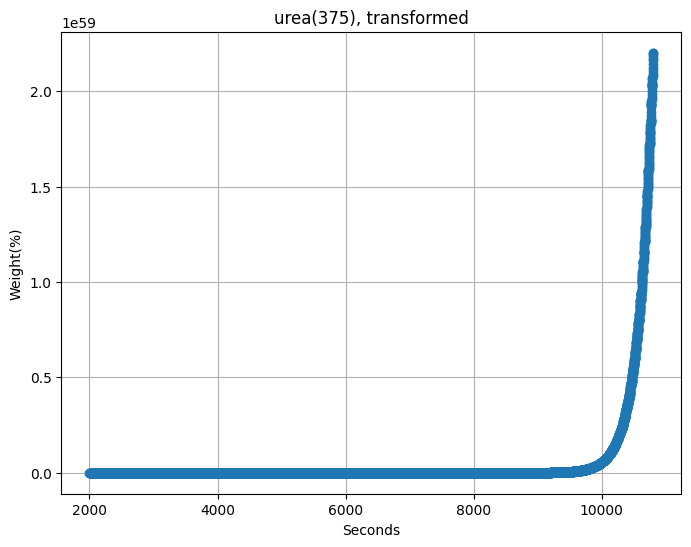

In [18]:
# Data transformation
subset6 = B2.loc[2000:]

X6 = subset6["Seconds"].values.reshape(-1, 1)
y6 = np.exp(subset6["Weight(%)"].values)

plt.figure(figsize=(8, 6))
plt.plot(X6, y6, marker='o')

plt.xlabel('Seconds')
plt.ylabel('Weight(%)')
plt.title('QNO3(375), transformed')
plt.grid(True)
plt.show()

Data conversion was performed to use the logarithmic function using the previous machine learning results, but in both cases, it was not correct. In particular, in the case of QNO3(375), it was almost impossible to apply the logarithmic function.